In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.normal(0, 2, size=X.shape[0])  # y = 3x + noise

In [4]:
# Step 2: Preprocessing (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Define Prior Distributions (Bayesian Ridge internally assumes Gaussian priors)
model = BayesianRidge()

In [7]:
# Step 5: Compute Posterior Distribution & Train the Model
model.fit(X_train, y_train)

BayesianRidge()

In [8]:
# Step 6: Compute Predictions
y_pred = model.predict(X_test)

In [9]:
# Step 7: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Estimated Coefficients: {model.coef_}")
print(f"Estimated Intercept: {model.intercept_}")

Mean Squared Error (MSE): 2.4886
R-squared (R²): 0.9683
Estimated Coefficients: [8.81280515]
Estimated Intercept: 14.760625449694244


Prediction for X=2.5: 7.2045


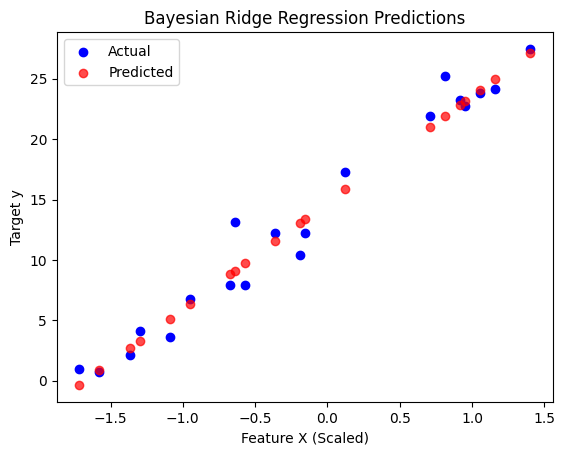

In [10]:
# Step 8: Predict New Data
X_new = np.array([[2.5]])  # Example input
X_new_scaled = scaler.transform(X_new)
y_new_pred = model.predict(X_new_scaled)
print(f"Prediction for X={X_new.flatten()[0]}: {y_new_pred[0]:.4f}")

# Plot Predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.7)
plt.xlabel("Feature X (Scaled)")
plt.ylabel("Target y")
plt.legend()
plt.title("Bayesian Ridge Regression Predictions")
plt.show()